# Tarea semanal 8
## Martín Deleón

### Consignas:

En esta tarea se solicitó la resolución de algunos ejercicios especificicos de la guia y tambien se propuso un ejercicio para resolver. Todos estos ejercicios tienen como proposito la ejercictación e implementación de filtros FIR e IIR. A continuación se encuentran los ejercicios propuestos.

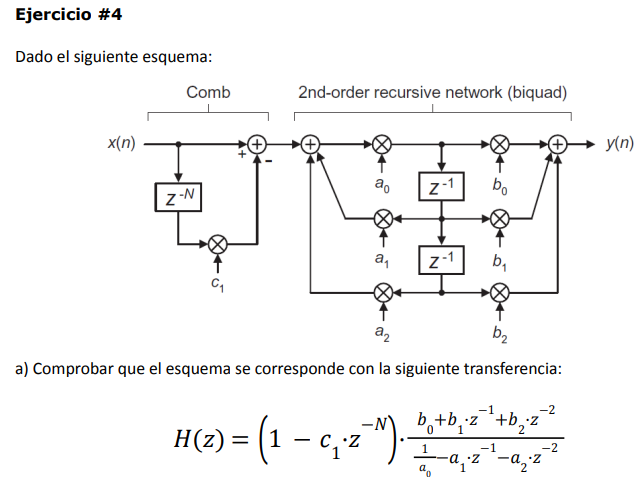
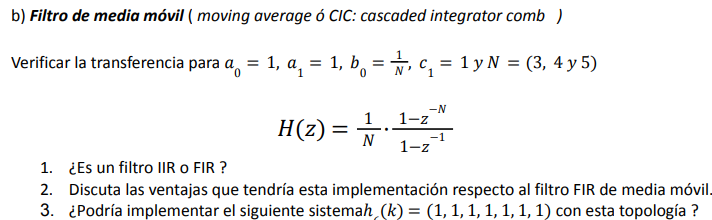
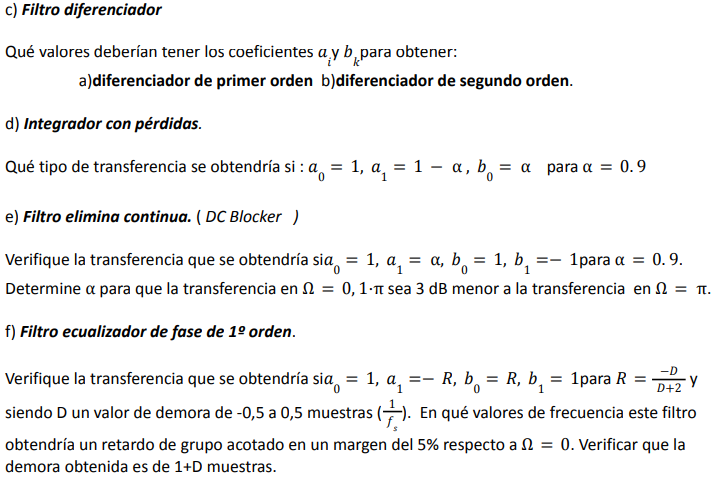
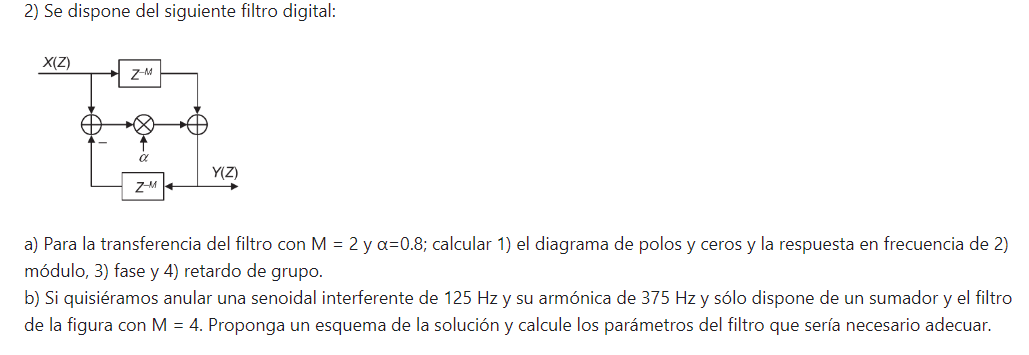

Para resolver estos ejecicios, primero se realizo el desarrollo matemático en papel y luego se verificó utilizando Python. Cabe destacar que algunos ejercicios no estan completos en papel debido a que el desarrolo a realizar era extremadamente largo y se prefirió simular dichas secciones para obtener los resultados.

### Desarrollo en papel

In [27]:
from IPython.display import IFrame
IFrame("./TS8.pdf", width=1000, height=1000)

In [2]:
import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt
from pytc2.sistemas_lineales import analyze_sys

#### Ejercicio 1
##### Parte b
Despues de haber verificado la ecuacion solicitada en el incizo "a", procedo a verificar el gráfico de modulo y fase que esta desarrollado en el papel, este será el procedimiento para todos estos ejercicios, por lo que no se repetirá esta explicación.
    

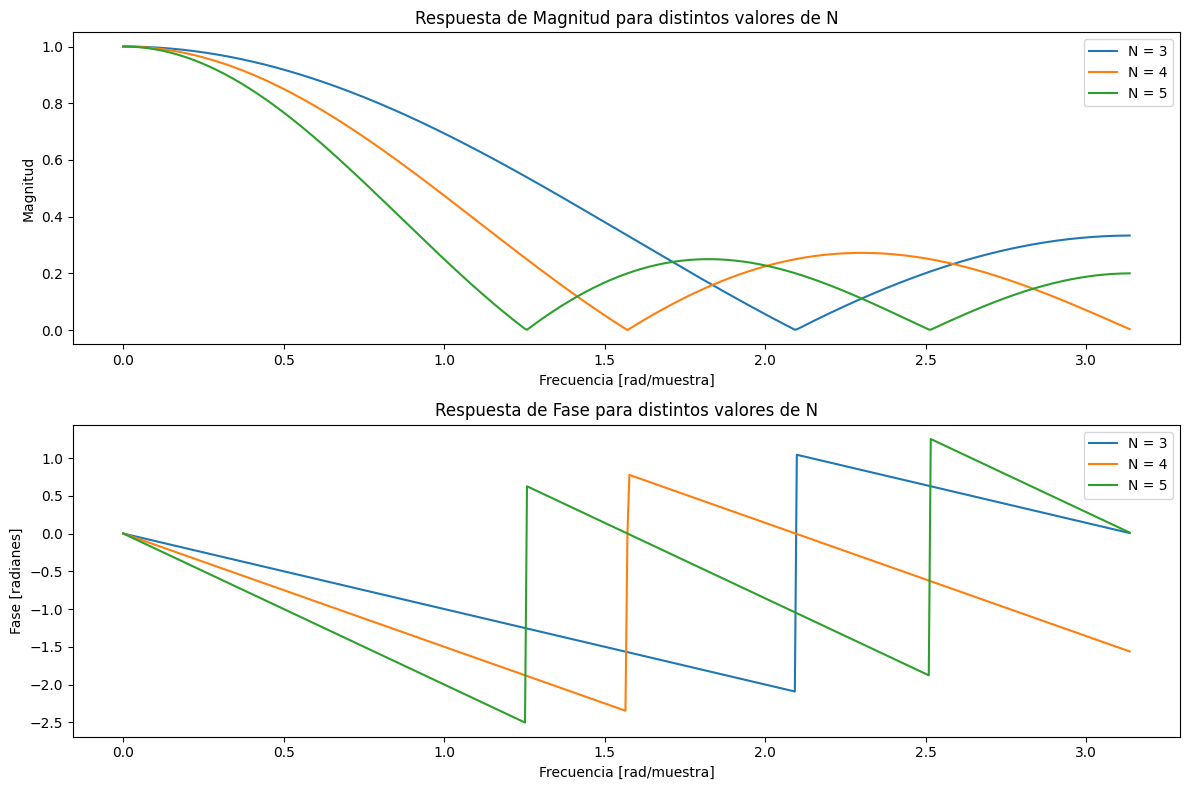

In [14]:
from scipy import signal

# Lista de valores de N a comparar
N_values = [3, 4, 5]

# Inicializar figura
plt.figure(figsize=(12, 8))

# Graficar la respuesta de magnitud para distintos N
plt.subplot(2, 1, 1)
for N in N_values:
    b = (1/N) * np.ones(N)  # Coeficientes del numerador FIR
    a = [1]  # Denominador es 1 porque es FIR
    
    # Calcular la respuesta en frecuencia
    w, h = signal.freqz(b, a)
    
    # Respuesta en magnitud
    magnitude = np.abs(h)
    
    # Graficar para cada N
    plt.plot(w, magnitude, label=f'N = {N}')
    
plt.title('Respuesta de Magnitud para distintos valores de N')
plt.xlabel('Frecuencia [rad/muestra]')
plt.ylabel('Magnitud')
plt.legend()

# Graficar la respuesta de fase para distintos N
plt.subplot(2, 1, 2)
for N in N_values:
    b = (1/N) * np.ones(N)  # Coeficientes del numerador FIR
    a = [1]  # Denominador es 1
    
    # Calcular la respuesta en frecuencia
    w, h = signal.freqz(b, a)
    
    # Respuesta de fase (desenvuelta para evitar saltos)
    phase = np.angle(h)
    unwrapped_phase = np.unwrap(phase)
    
    # Graficar para cada N
    plt.plot(w, unwrapped_phase, label=f'N = {N}')
    
plt.title('Respuesta de Fase para distintos valores de N')
plt.xlabel('Frecuencia [rad/muestra]')
plt.ylabel('Fase [radianes]')
plt.legend()

plt.tight_layout()
plt.show()




Por alguna razon que no puedo explicar en este momento, la fase sigue haciendo esos saltos, que no estan mal, pero que esperaba que la función unwrap solucione. Pese a eso podemos ver que la fase es constantemente decreciente, y si calcularamos el retardo de grupo nos daria constante.

##### Parte c

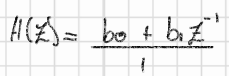

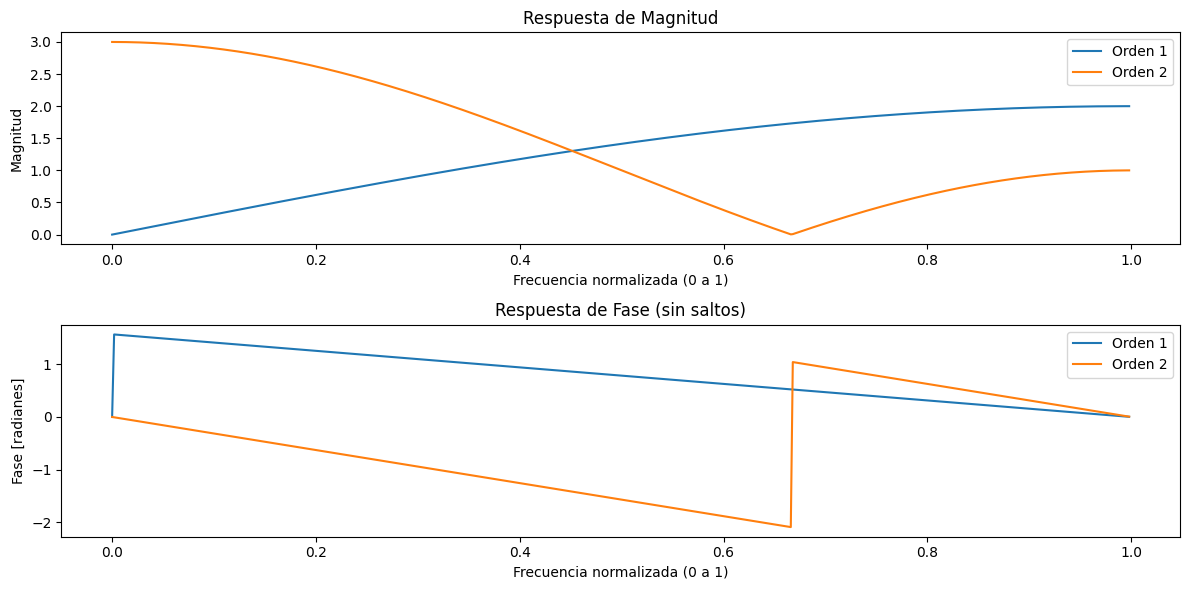

In [19]:
# Coeficientes del filtro
b = [1, -1]  # Coeficientes del numerador
b2 =[1, 1, 1]
a = [1]  # Coeficientes del denominador

# Calcular la respuesta en frecuencia
w, h = signal.freqz(b, a)
w, h2 = signal.freqz(b2, a)

# Respuesta en magnitud y fase
magnitude = np.abs(h)
magnitude2 = np.abs(h2)
phase = np.angle(h)
phase2 = np.angle(h2)

# Usar unwrap para evitar saltos en la fase
unwrapped_phase = np.unwrap(phase)
unwrapped_phase2 = np.unwrap(phase2)

# Convertir la frecuencia de radianes por muestra a Hz (opcional, depende de tu aplicación)
# Si solo quieres en radianes por muestra, puedes omitir esto
w_normalized = w / np.pi  # Normalizar la frecuencia para que vaya de 0 a 1 (corresponde a 0 a pi rad)

# Graficar la respuesta en magnitud y fase
plt.figure(figsize=(12, 6))

# Respuesta de Magnitud
plt.subplot(2, 1, 1)
plt.plot(w_normalized, magnitude, label= "Orden 1")
plt.plot(w_normalized, magnitude2, label= "Orden 2")
plt.title('Respuesta de Magnitud')
plt.xlabel('Frecuencia normalizada (0 a 1)')
plt.ylabel('Magnitud')
plt.legend()

# Respuesta de Fase (sin saltos)
plt.subplot(2, 1, 2)
plt.plot(w_normalized, unwrapped_phase, label= "Orden 1")
plt.plot(w_normalized, unwrapped_phase2, label= "Orden 2")
plt.title('Respuesta de Fase (sin saltos)')
plt.xlabel('Frecuencia normalizada (0 a 1)')
plt.ylabel('Fase [radianes]')
plt.legend()

plt.tight_layout()
plt.show()


##### Parte D
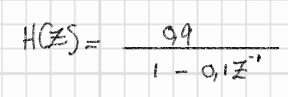

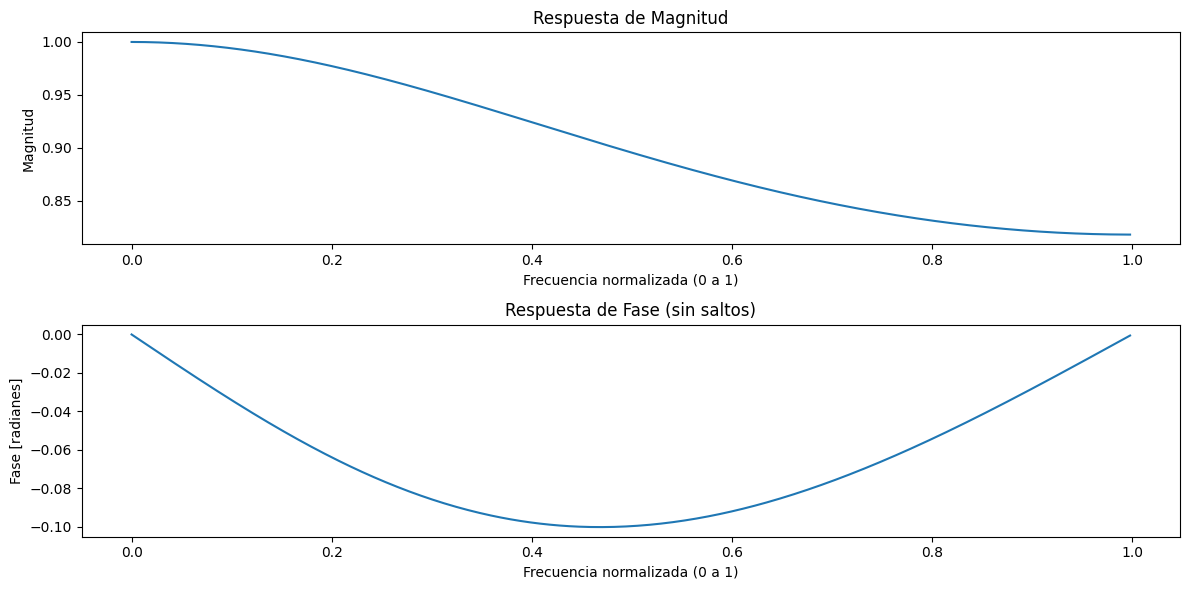

In [21]:
# Coeficientes del filtro
b = [0.9]  # Coeficientes del numerador
a = [1, -0.1]  # Coeficientes del denominador

# Calcular la respuesta en frecuencia
w, h = signal.freqz(b, a)

# Respuesta en magnitud y fase
magnitude = np.abs(h)
phase = np.angle(h)

# Usar unwrap para evitar saltos en la fase
unwrapped_phase = np.unwrap(phase)

# Convertir la frecuencia de radianes por muestra a Hz (opcional, depende de tu aplicación)
# Si solo quieres en radianes por muestra, puedes omitir esto
w_normalized = w / np.pi  # Normalizar la frecuencia para que vaya de 0 a 1 (corresponde a 0 a pi rad)

# Graficar la respuesta en magnitud y fase
plt.figure(figsize=(12, 6))

# Respuesta de Magnitud
plt.subplot(2, 1, 1)
plt.plot(w_normalized, magnitude)
plt.title('Respuesta de Magnitud')
plt.xlabel('Frecuencia normalizada (0 a 1)')
plt.ylabel('Magnitud')

# Respuesta de Fase (sin saltos)
plt.subplot(2, 1, 2)
plt.plot(w_normalized, unwrapped_phase)
plt.title('Respuesta de Fase (sin saltos)')
plt.xlabel('Frecuencia normalizada (0 a 1)')
plt.ylabel('Fase [radianes]')

plt.tight_layout()
plt.show()

En este punto si encuentro diferencias con lo calculado en el cuaderno, sin embbargo luego de revisar varias veces no puedo encontrar dónde esta el error, por lo que continuo con el objetivo de consultar esos gráficos más adelante. Sin embargo comprendo que estos gráficos son los que efectivamente deben estar correctos, o por lo menos a estos no les encuentro algun error.

##### Parte E
En este punto me encontre con la difucltad de buscar algo que sea en amplitud 3dB menor a 0 veces, lo cual no tien sentido alguno, por lo que esta sección no se simulará. Pero el desarrollo de este ejercicio se encuentra en el pdf.

##### Parte D

En esta sección se pedia obtener una transferencia y su demora. En este caso calcular la demora en papel, requería demasiada algebra, por lo que se decidió continuar esta sección cuando se realice el codigo en Python de las otras secciónes, por lo que llego el momento de realizar dicha tarea.

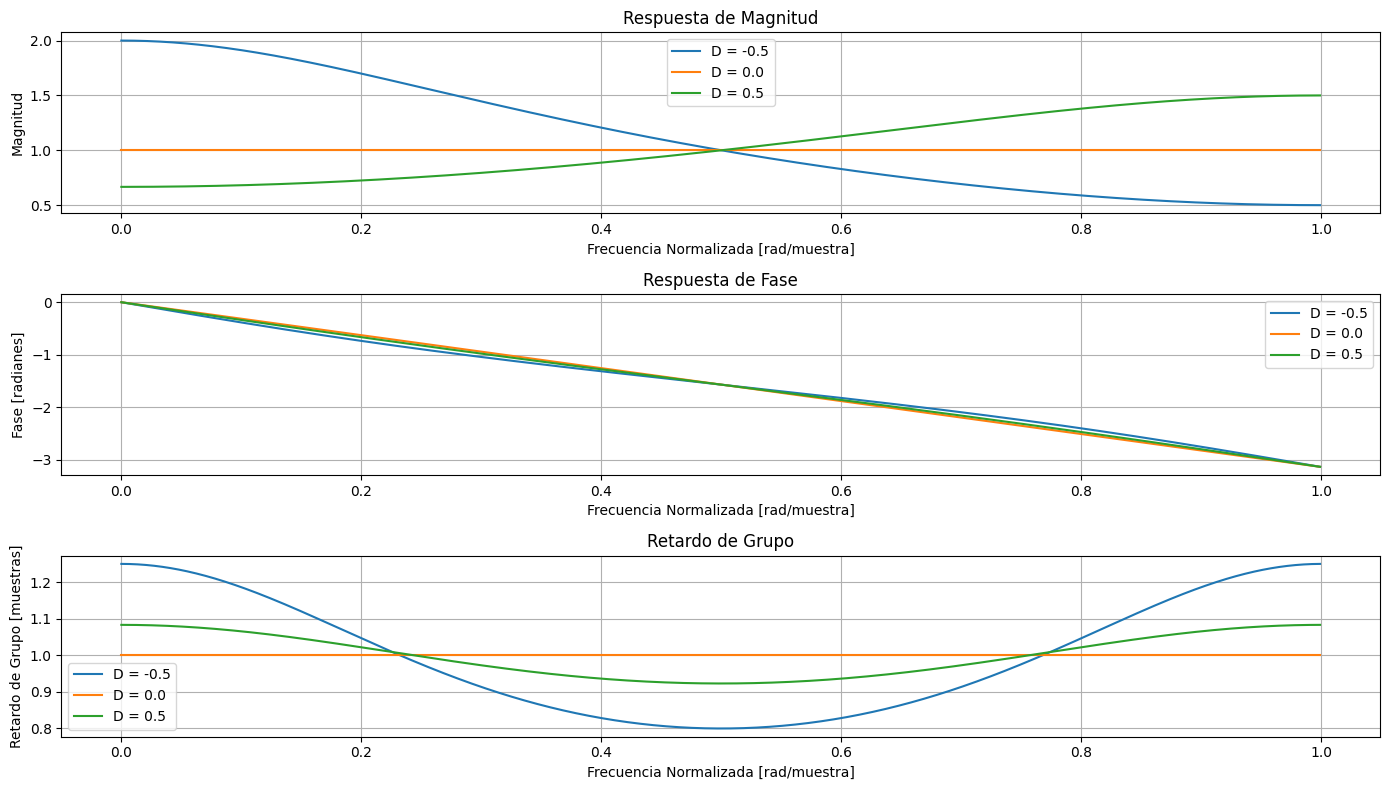

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Definir función para calcular el retardo de grupo
def group_delay(b, a, w):
    _, gd = signal.group_delay((b, a), w=w)
    return gd

# Definir los coeficientes del filtro
def calculate_R(D):
    return -D / (D + 2)

def plot_response(D_values):
    plt.figure(figsize=(14, 8))
    
    # Gráfico de la respuesta en magnitud, fase y retardo de grupo
    for D in D_values:
        # Calcular R para el valor dado de D
        R = calculate_R(D)
        
        # Coeficientes del filtro
        b = [R, 1]  # Numerador
        a = [1, -R]  # Denominador

        # Calcular respuesta en frecuencia
        w, h = signal.freqz(b, a, worN=1024)
        frequencies = w / np.pi  # Frecuencia normalizada (rad/muestra)

        # Respuesta en magnitud
        magnitude = np.abs(h)

        # Respuesta de fase (desenvuelta)
        phase = np.angle(h)
        unwrapped_phase = np.unwrap(phase)

        # Retardo de grupo
        group_delay_values = group_delay(b, a, w)

        # Magnitud
        plt.subplot(3, 1, 1)
        plt.plot(frequencies, magnitude, label=f'D = {D}')
        plt.title('Respuesta de Magnitud')
        plt.xlabel('Frecuencia Normalizada [rad/muestra]')
        plt.ylabel('Magnitud')
        plt.grid(True)
        
        # Fase
        plt.subplot(3, 1, 2)
        plt.plot(frequencies, unwrapped_phase, label=f'D = {D}')
        plt.title('Respuesta de Fase')
        plt.xlabel('Frecuencia Normalizada [rad/muestra]')
        plt.ylabel('Fase [radianes]')
        plt.grid(True)
        
        # Retardo de Grupo
        plt.subplot(3, 1, 3)
        plt.plot(frequencies, group_delay_values, label=f'D = {D}')
        plt.title('Retardo de Grupo')
        plt.xlabel('Frecuencia Normalizada [rad/muestra]')
        plt.ylabel('Retardo de Grupo [muestras]')
        plt.grid(True)
    
    # Mostrar las leyendas
    plt.subplot(3, 1, 1)
    plt.legend()
    plt.subplot(3, 1, 2)
    plt.legend()
    plt.subplot(3, 1, 3)
    plt.legend()

    plt.tight_layout()
    plt.show()

# Valores de D para analizar (-0.5 a 0.5 muestras)
D_values = [-0.5, 0.0, 0.5]

# Ejecutar la función para graficar las respuestas
plot_response(D_values)


Podemos concluir entonces que el filtro de ecualización de fase de primer orden estudiado tiene un retardo de grupo bien definido y constante en las frecuencias bajas (alrededor de $\Omega=0$), con un comportamiento que concuerda con el valor de $1+D$ muestras. Este filtro logra mantener el retardo de grupo acotado en un margen del 5% para bajas frecuencias, lo que lo hace adecuado para aplicaciones donde se requiere una compensación o ecualización de fase precisa en esta región del espectro.
Por otro lado en frecuencias altas el retardo de grupo diverge, lo cual tiene sentido dado que podemos observar como la fase del mismo no es lineal. En caso de tener $D = 0$ si podemos obtener un filtro FIR con retardo constante.

#### Ejericio 2

Para refrescar, la consigna del ejercicio era la siguiente:
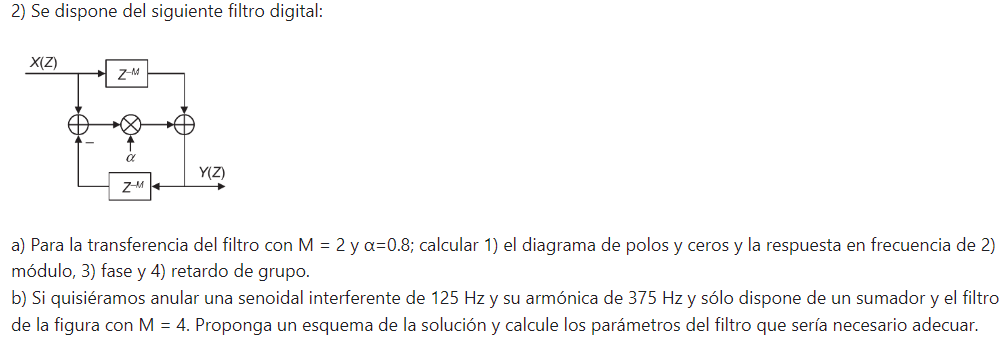

##### Parte A

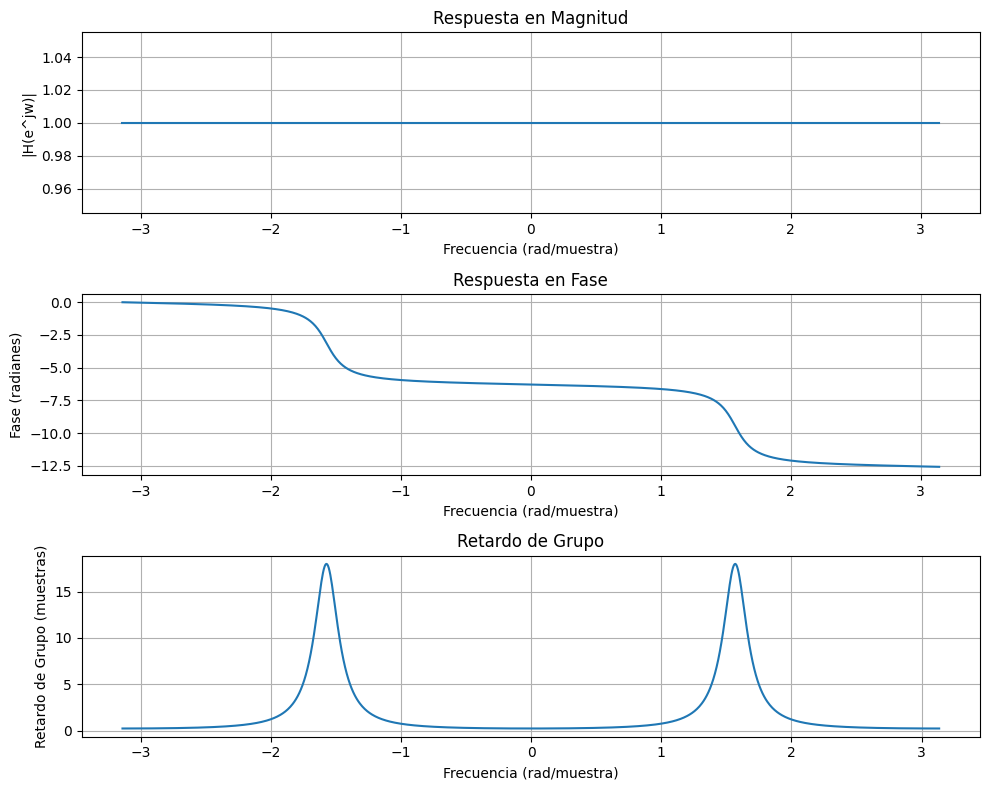

In [25]:
# Parámetros
M = 2
alpha = 0.8
w = np.linspace(-np.pi, np.pi, 1000)  # Rango de frecuencias

# Función de transferencia H(z) = (alpha + z^(-M)) / (1 + alpha * z^(-M))
numerador = alpha + np.exp(-1j * M * w)
denominador = 1 + alpha * np.exp(-1j * M * w)
H = numerador / denominador

# Módulo y Fase
modulo = np.abs(H)
fase =np.unwrap(np.angle(H))

# Cálculo del retardo de grupo (derivada de la fase)
dw = w[1] - w[0]  # Paso de frecuencia
retardo_grupo = -np.diff(fase) / dw
w_delay = w[:-1]  # Ajuste de frecuencia para graficar el retardo de grupo

# Graficar
plt.figure(figsize=(10, 8))

# Respuesta en magnitud
plt.subplot(3, 1, 1)
plt.plot(w, modulo)
plt.title('Respuesta en Magnitud')
plt.xlabel('Frecuencia (rad/muestra)')
plt.ylabel('|H(e^jw)|')
plt.grid()

# Respuesta en fase
plt.subplot(3, 1, 2)
plt.plot(w, fase)
plt.title('Respuesta en Fase')
plt.xlabel('Frecuencia (rad/muestra)')
plt.ylabel('Fase (radianes)')
plt.grid()

# Retardo de grupo
plt.subplot(3, 1, 3)
plt.plot(w_delay, retardo_grupo)
plt.title('Retardo de Grupo')
plt.xlabel('Frecuencia (rad/muestra)')
plt.ylabel('Retardo de Grupo (muestras)')
plt.grid()

plt.tight_layout()
plt.show()



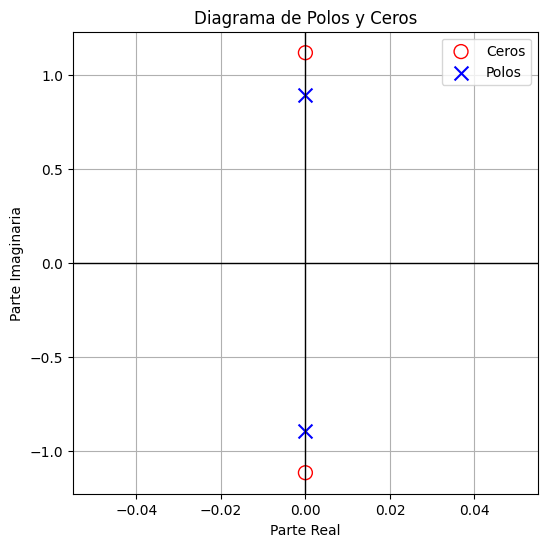

In [26]:
from numpy import roots
# Parámetros
M = 2
alpha = 0.8

# Coeficientes del numerador y denominador de la función de transferencia
numerator_coeffs = [alpha] + [0] * (M - 1) + [1]  # αz^M + 1
denominator_coeffs = [1] + [0] * (M - 1) + [alpha]  # z^M + α

# Cálculo de polos y ceros
zeros = roots(numerator_coeffs)
poles = roots(denominator_coeffs)

# Gráfica de polos y ceros
plt.figure(figsize=(6, 6))
plt.scatter(zeros.real, zeros.imag, s=100, marker='o', facecolors='none', edgecolors='r', label='Ceros')
plt.scatter(poles.real, poles.imag, s=100, marker='x', color='b', label='Polos')
plt.title('Diagrama de Polos y Ceros')
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginaria')
plt.grid()
plt.legend()
plt.show()


Podemos ver como tanto el diagrama de polos y ceros como el de modulo coincide con lo realizado en papel, por otro lado el diagrama de fase que no se había realizado en papel, tiene sentido, dado que estos filtros modifican la fase dejando el modulo lo mas constante posible. Por otro lado el retardo de grupo se realizo "a mano" dado que la función group delay no es muy recomendable para filtros digitales, aunque para este filtro de orden bajo, no deberia haber problema, decidi hacerlo igual que en la TS9.

##### Parte B

Para eliminar la senoidal con este filtro de 4to orden, debemos generar una inversión completa de fase en la frecuencia deseada que en este caso serian los $125 Hz$ y a esta salida sumarle la entrada original para que se genere una interferencia del tipo destructiva, eliminando dicha señal, esta forma tal vez es algo básica, pero simple, por lo que tiene gran potencial.